# Week 14 Activity
Unsupervised Machine Learning
Our Case study :
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

How will you help this NGO to make a correct decision based on socio-economic and health factors?

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'Downloads\Country-data.csv')

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
df.shape

(167, 10)

There were 167 rows and 10 columns

In [7]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
df.isna().sum().to_frame('Null value')

,Null value
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


There is no null value

# Preprocessing
Outlier Analysis

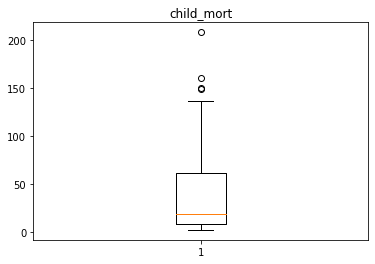

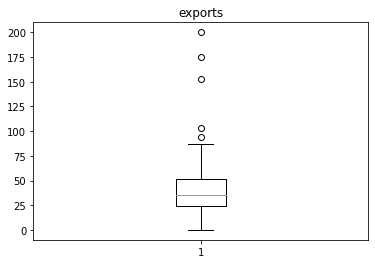

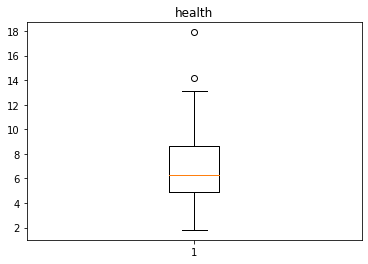

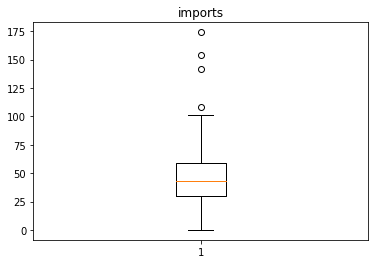

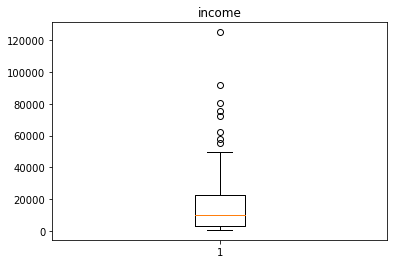

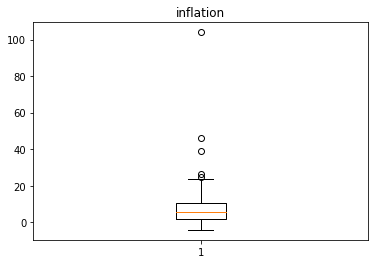

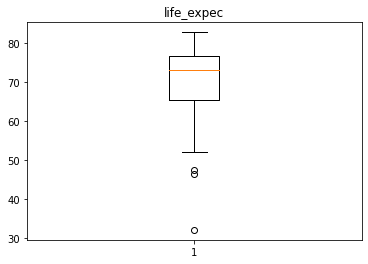

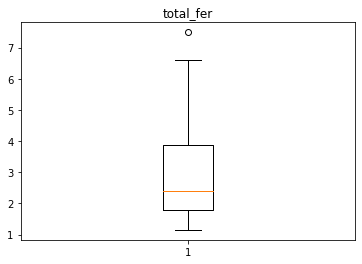

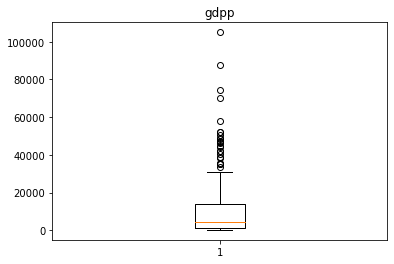

In [9]:
for i in ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']:
    plt.title(i)
    plt.boxplot(df[i])
    plt.show()

In [10]:
df1 = df.columns.to_list()
df1.remove('country')
for i in df1:
    Q1=np.percentile(df[i],25,interpolation='midpoint')
    Q2=np.percentile(df[i],50,interpolation='midpoint')
    Q3=np.percentile(df[i],75,interpolation='midpoint')
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    df.loc[df[i]<lower_limit, i]=lower_limit
    df.loc[df[i]>upper_limit, i]=upper_limit

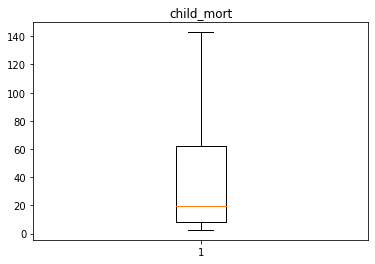

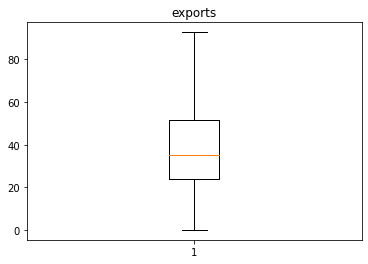

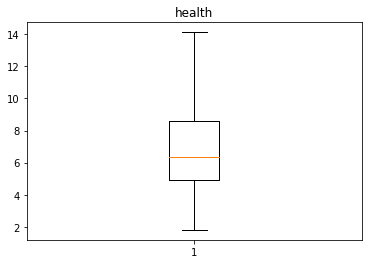

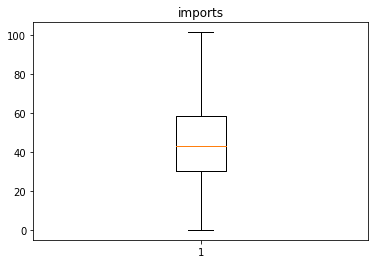

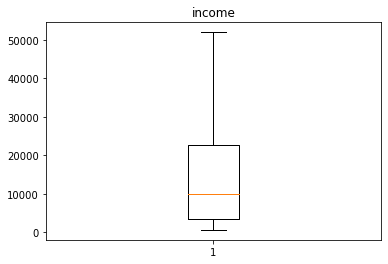

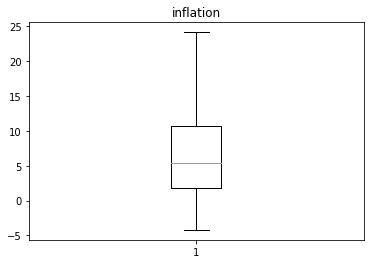

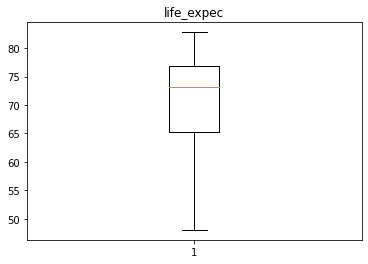

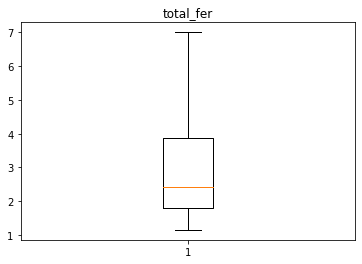

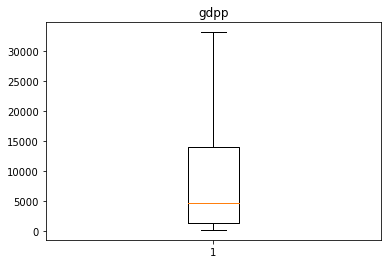

In [11]:
for i in ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']:
    plt.title(i)
    plt.boxplot(df[i])
    plt.show()

Outlier After processing

<Figure size 288x288 with 0 Axes>

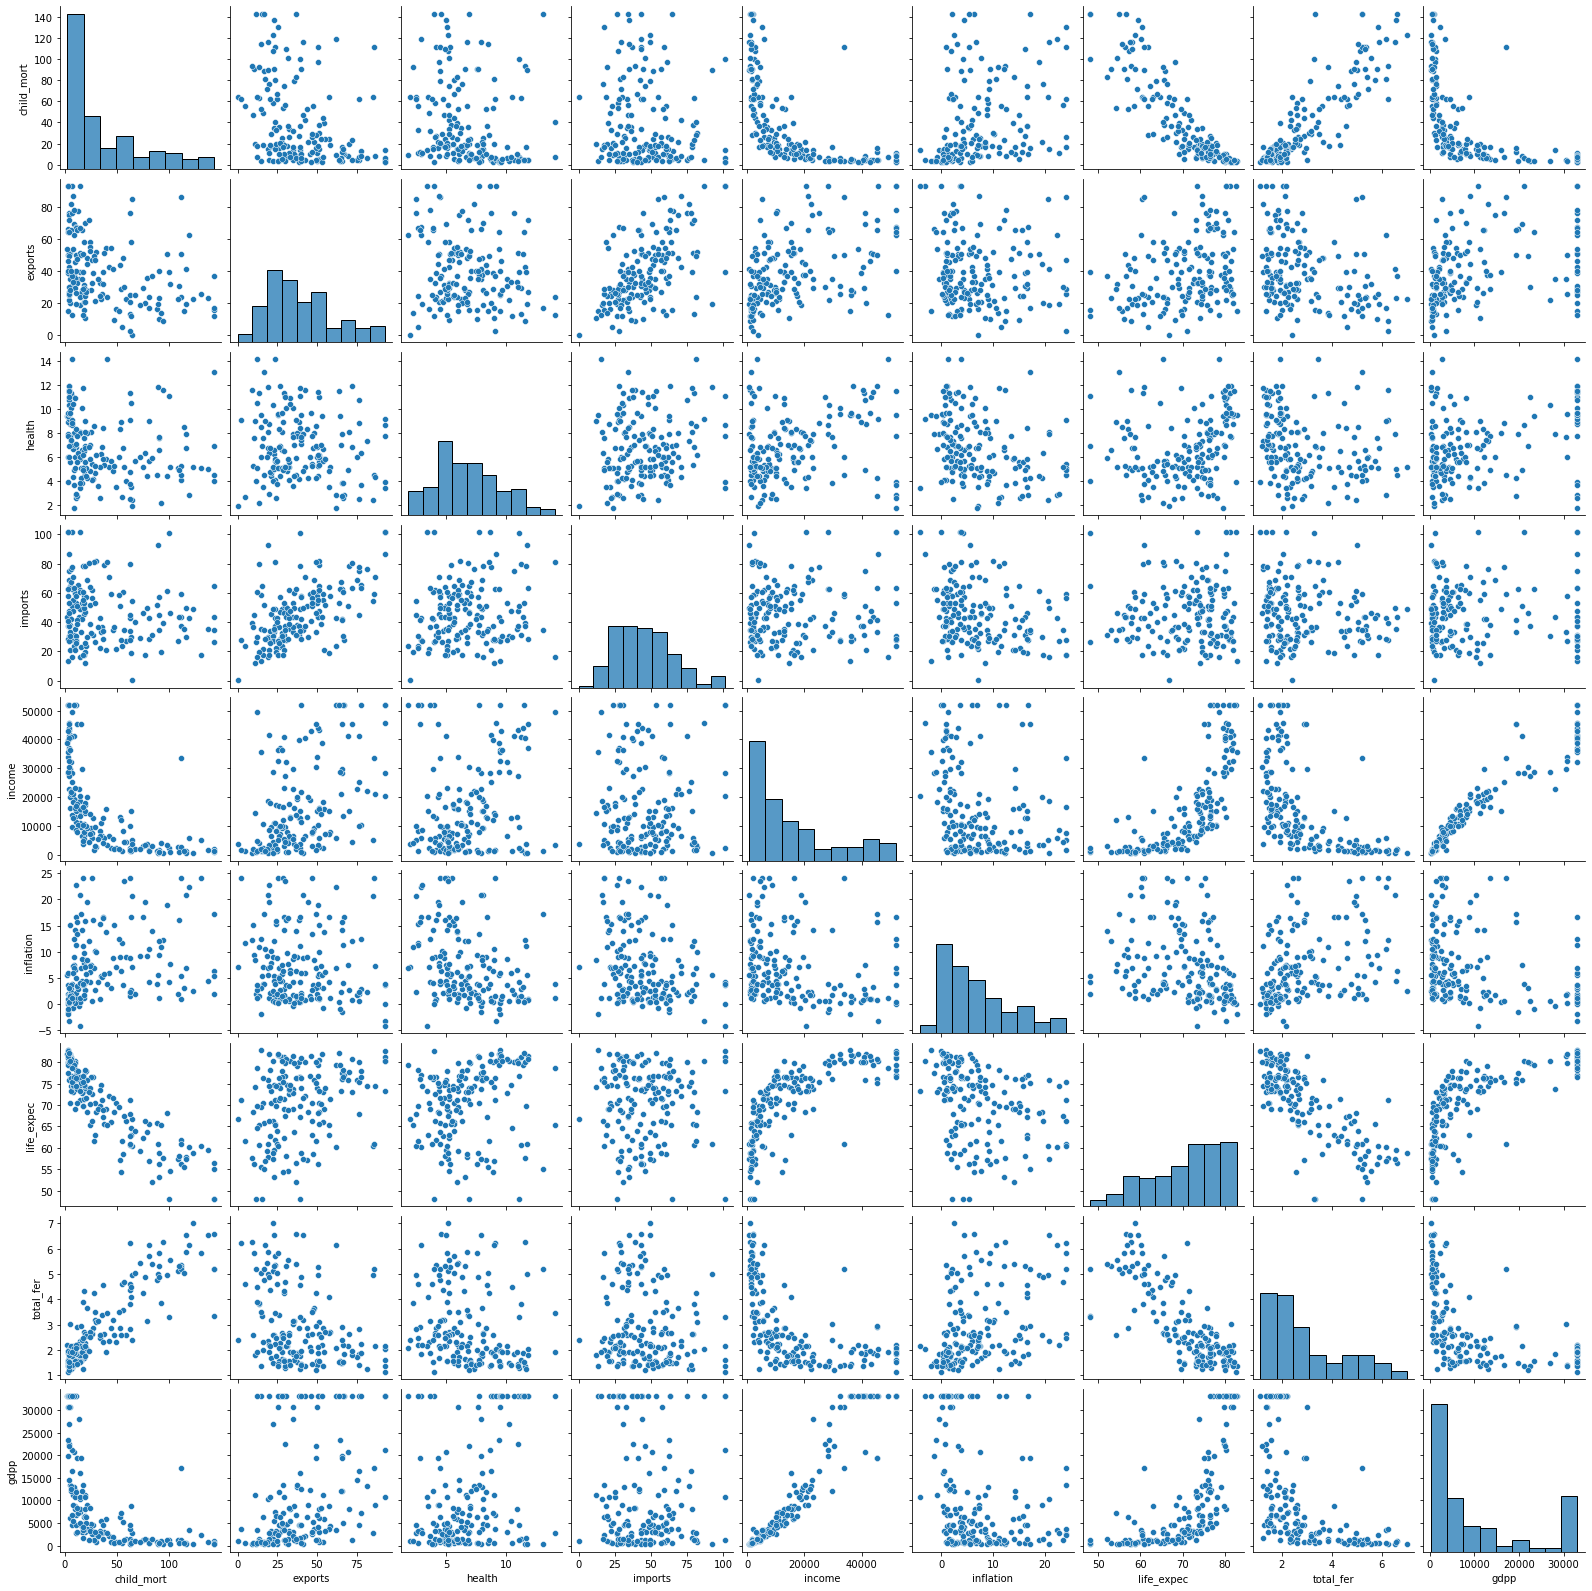

In [12]:
#Visualize the data
plt.figure(figsize = (4,4))
sns.pairplot(df)
plt.show()

In [13]:
#Scaling the data
data_sc=df.drop('country', axis=1)
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
data_sc = standard_scaler.fit_transform(data_sc)

In [14]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,7):
  kmeans=KMeans(n_clusters=i, init='k-means++',  random_state=42)
  kmeans.fit(data_sc)
  wcss.append(kmeans.inertia_)

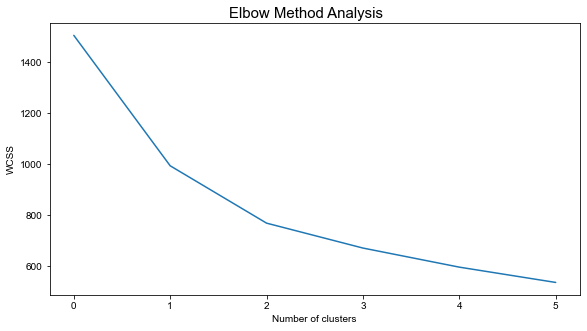

In [15]:
fig, axes = plt.subplots(1, 1, figsize=(9.5, 5))
fig.suptitle('Elbow Method Analysis', fontsize=15, y=0.925)
sns.set_theme(style="whitegrid")
sns.lineplot(data=wcss)
axes.set(xlabel='Number of clusters', ylabel='WCSS')
plt.show()

Number of cluster = 2

In [16]:
kmeans=KMeans(n_clusters=2, init='k-means++', random_state=42)
y_kmeans=kmeans.fit_predict(data_sc)
data_scaler = pd.concat([df, pd.Series(y_kmeans)], axis = 1)
data_scaler.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','clusters']
data_scaler.sample(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
142,Sudan,76.7,19.700,6.32,17.200,3370.0,19.60,66.3,4.88,1480.0,1
130,Serbia,7.6,32.900,10.40,47.900,12700.0,5.88,74.7,1.40,5410.0,0
71,Iran,19.3,24.400,5.60,19.400,17400.0,15.90,74.5,1.76,6530.0,0
16,Belize,18.8,58.200,5.20,57.500,7880.0,1.14,71.4,2.71,4340.0,0
91,Luxembourg,2.8,92.675,7.77,101.575,51967.5,3.62,81.3,1.63,33130.0,0


<AxesSubplot:xlabel='life_expec', ylabel='child_mort'>

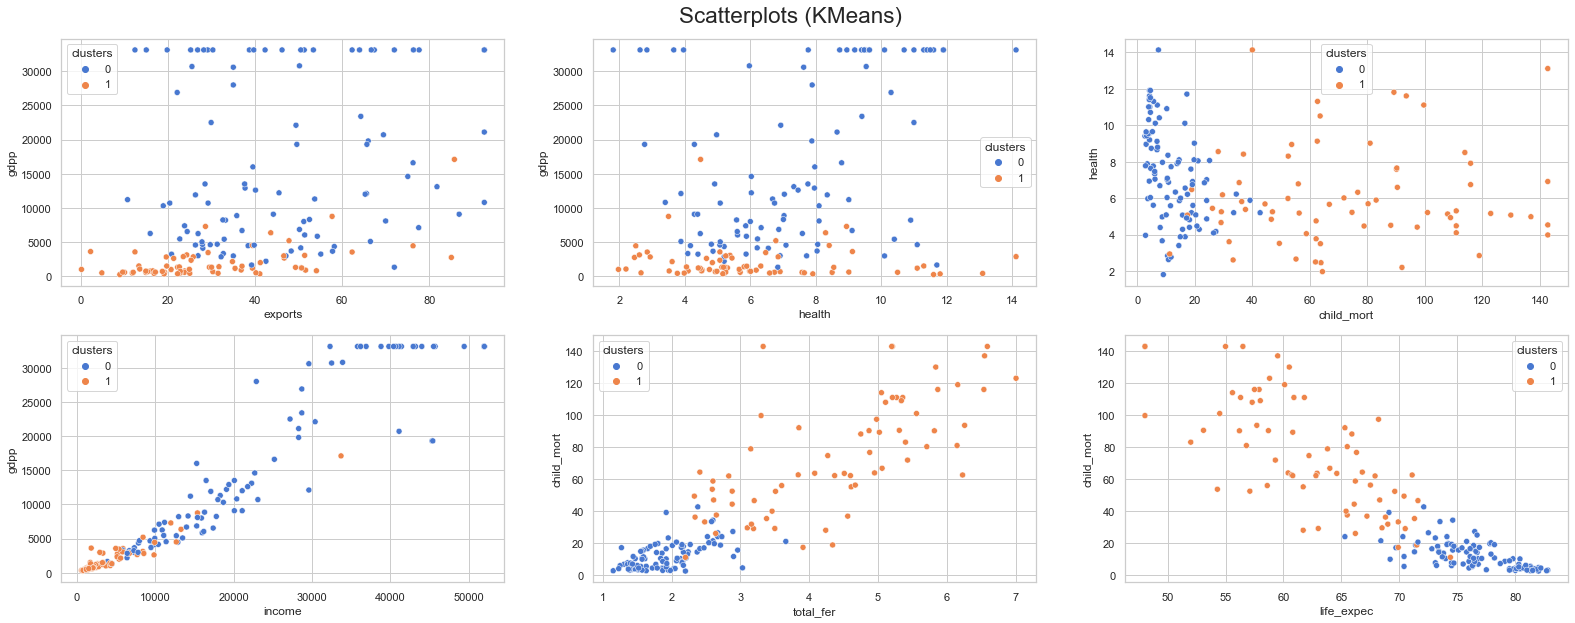

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(27, 10))
fig.suptitle('Scatterplots (KMeans)', fontsize=22.5, y=0.925)
sns.set_theme(style="whitegrid", palette="muted")
sns.scatterplot(ax=axes[0,0], x = 'exports', y = 'gdpp', hue ='clusters', legend = 'full', data = data_scaler)
sns.scatterplot(ax=axes[0,1], x = 'health', y = 'gdpp', hue ='clusters', legend = 'full', data = data_scaler)
sns.scatterplot(ax=axes[0,2], x = 'child_mort', y = 'health', hue ='clusters', legend = 'full', data = data_scaler)
sns.scatterplot(ax=axes[1,0], x = 'income', y = 'gdpp', hue ='clusters', legend = 'full', data = data_scaler )
sns.scatterplot(ax=axes[1,1], x = 'total_fer', y = 'child_mort', hue ='clusters', legend = 'full', data = data_scaler)
sns.scatterplot(ax=axes[1,2], x = 'life_expec', y = 'child_mort', hue ='clusters', legend = 'full', data = data_scaler)

In these graphs cluster 1 has low exports,health,income and highlife_expec,total_fer,child_mor 

In [18]:
pd.set_option('display.max_rows', None)
data_scaler[data_scaler.clusters == 1].country.to_frame()

,country
0,Afghanistan
3,Angola
12,Bangladesh
17,Benin
19,Bolivia
21,Botswana
25,Burkina Faso
26,Burundi
27,Cambodia
28,Cameroon


In [19]:
top_kmeans = data_scaler[data_scaler.clusters==1].sort_values(["child_mort"], ascending=False)
top_kmeans = top_kmeans.reset_index().drop('index',axis=1)
top_kmeans.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Chad,142.875,36.8,4.53,43.5,1930.0,6.39,56.50,6.5900,897.0,1
1,Central African Republic,142.875,11.8,3.98,26.5,888.0,2.01,48.05,5.2100,446.0,1
2,Haiti,142.875,15.3,6.91,64.7,1500.0,5.45,48.05,3.3300,662.0,1
3,Sierra Leone,142.875,16.8,13.10,34.5,1220.0,17.20,55.00,5.2000,399.0,1
4,Mali,137.000,22.8,4.98,35.1,1870.0,4.37,59.50,6.5500,708.0,1
5,Nigeria,130.000,25.3,5.07,17.4,5150.0,24.16,60.50,5.8400,2330.0,1
6,Niger,123.000,22.2,5.16,49.1,814.0,2.55,58.80,7.0075,348.0,1
7,Angola,119.000,62.3,2.85,42.9,5900.0,22.40,60.10,6.1600,3530.0,1
8,Burkina Faso,116.000,19.2,6.74,29.6,1430.0,6.81,57.90,5.8700,575.0,1
9,"Congo, Dem. Rep.",116.000,41.1,7.91,49.6,609.0,20.80,57.50,6.5400,334.0,1


Here we identified top countries with KMean model

# Agglomerative Hierarchical Clustering

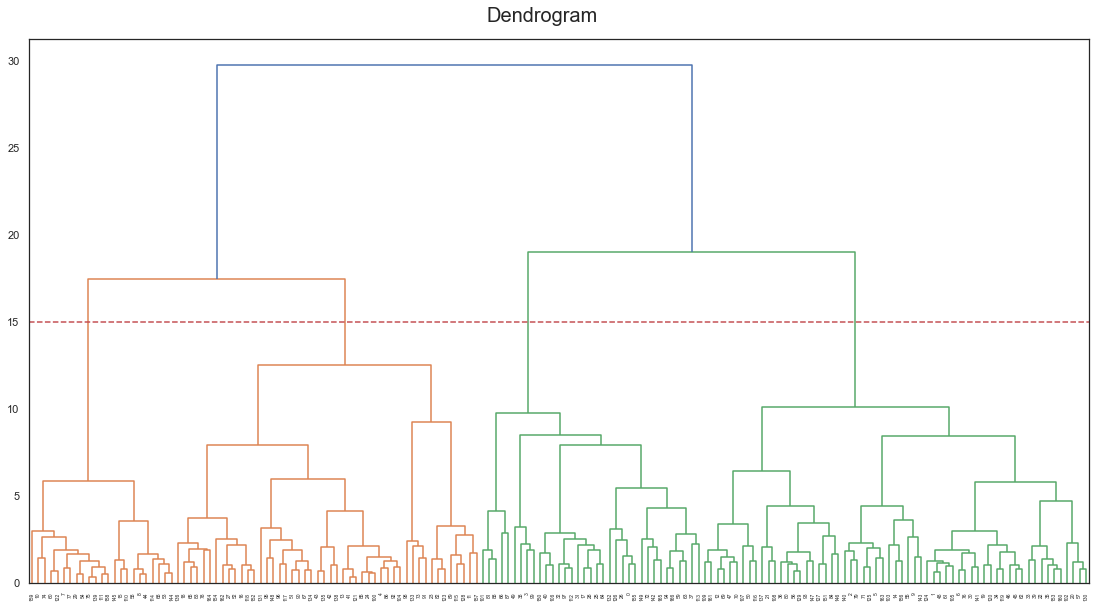

In [20]:
import scipy.cluster.hierarchy as ch
plt.figure(figsize=(19,10))
sns.set_theme(style="white")
plt.suptitle('Dendrogram', fontsize=20, y=0.925)
dendrogram=ch.dendrogram(ch.linkage(data_sc,method='ward'))
plt.hlines(15,0,2000, colors="r", linestyles="dashed")
plt.show()

Cluster Nuber is 4 from the above graph

In [37]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_hc=hc.fit_predict(data_sc)
data_scaler2= pd.concat([df, pd.Series(y_hc)], axis = 1)
data_scaler2.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','clusters']
data_scaler2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,0


In [38]:
#Hierarchial models
data_scaler1[data_scaler1.clusters == 2].country.to_frame()

,country
0,Afghanistan
3,Angola
17,Benin
25,Burkina Faso
26,Burundi
28,Cameroon
31,Central African Republic
32,Chad
37,"Congo, Dem. Rep."
38,"Congo, Rep."


In [28]:
#Top 10
top_hc = data_scaler1[data_scaler1['clusters']==0].sort_values(["child_mort"], ascending=False) 
top_hc = top_hc.reset_index().drop('index',1)
top_hc.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Turkmenistan,62.0,76.3,2.50,44.5,9940.0,2.31,67.9,2.83,4440.0,0
1,Cambodia,44.4,54.1,5.68,59.5,2520.0,3.12,66.1,2.88,786.0,0
2,Bhutan,42.7,42.5,5.20,70.7,6420.0,5.99,72.1,2.38,2180.0,0
3,Guyana,37.6,51.4,5.38,79.1,5840.0,5.73,65.5,2.65,3040.0,0
4,Kyrgyz Republic,29.6,51.6,6.18,81.7,2790.0,10.00,68.5,3.10,880.0,0
5,Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0,0
6,Solomon Islands,28.1,49.3,8.55,81.2,1780.0,6.81,61.7,4.24,1290.0,0
7,Fiji,24.1,57.8,4.86,63.9,7350.0,4.23,65.3,2.67,3650.0,0
8,Paraguay,24.1,55.1,5.87,51.5,7290.0,6.10,74.1,2.73,3230.0,0
9,Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0,0
